In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
data = boston.data

In [5]:
data.shape

(506, 13)

In [6]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:
target = boston.target

In [8]:
features_names = boston.feature_names
features_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
for line in boston.DESCR.split('\n'):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
X = pd.DataFrame(data, columns=features_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [12]:
y = pd.DataFrame(target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [13]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
price    506 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
y_pred = lr.predict(X_test)

In [20]:
check_test = pd.DataFrame({'y_test': y_test['price'], 
                           'y_pred': y_pred.flatten()})
check_test.head(10)

,y_test,y_pred
173,23.6,28.838854
274,32.4,36.007833
491,13.6,15.083248
72,22.8,25.230909
452,16.1,18.878641
76,20.0,23.213983
316,17.8,17.593112
140,14.0,14.305081
471,19.6,23.054390
500,16.8,20.620083


In [21]:
check_test['error'] = check_test['y_pred'] - check_test['y_test']
check_test.head(10)

,y_test,y_pred,error
173,23.6,28.838854,5.238854
274,32.4,36.007833,3.607833
491,13.6,15.083248,1.483248
72,22.8,25.230909,2.430909
452,16.1,18.878641,2.778641
76,20.0,23.213983,3.213983
316,17.8,17.593112,-0.206888
140,14.0,14.305081,0.305081
471,19.6,23.054390,3.454390
500,16.8,20.620083,3.820083


In [22]:
# среднеквадрат ошибка
init_mse = (check_test['error'] ** 2).mean()
init_mse

22.098694827098043

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
clk_mse = mean_squared_error(check_test['y_test'], check_test['y_pred'])
clk_mse

22.098694827098036

In [25]:
# средняя абсолютная ошибка
np.abs(check_test['error']).mean()

3.060939595437035

In [26]:
from sklearn.metrics import mean_absolute_error, r2_score

In [27]:
mean_absolute_error(check_test['y_test'], check_test['y_pred'])

3.060939595437034

In [28]:
# R^2
r2_score(check_test['y_test'], check_test['y_pred'])

0.6844267283527123

In [29]:
lr.intercept_

array([29.83642016])

In [30]:
lr.coef_

array([[-1.28322638e-01,  2.95517751e-02,  4.88590934e-02,
         2.77350326e+00, -1.62388292e+01,  4.36875476e+00,
        -9.24808158e-03, -1.40086668e+00,  2.57761243e-01,
        -9.95694820e-03, -9.23122944e-01,  1.31854199e-02,
        -5.17639519e-01]])

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Text(0, 0.5, 'Признак')

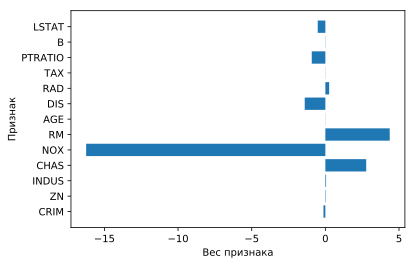

In [32]:
plt.barh(X_train.columns, lr.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')

In [33]:
# признаки не масштабированы и имеют разный разброс значений
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.468655,11.596306,11.119974,0.076517,0.558326,6.323496,69.147230,3.763440,9.361478,405.311346,18.263852,358.767124,12.513298
std,8.313983,23.093394,6.953401,0.266175,0.119118,0.720086,27.703149,2.112633,8.601322,166.060463,2.263954,87.511867,7.147690
min,0.009060,0.000000,1.210000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081930,0.000000,5.130000,0.000000,0.453000,5.890000,46.250000,2.075400,4.000000,279.000000,16.600000,376.140000,6.865000
50%,0.269380,0.000000,9.690000,0.000000,0.538000,6.226000,78.100000,3.112100,5.000000,330.000000,18.600000,391.340000,11.220000
75%,3.242325,20.000000,18.100000,0.000000,0.639000,6.664500,93.850000,5.250950,16.000000,666.000000,20.200000,395.760000,16.395000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [34]:
# Стандартизация призанков
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
X_train_scaled = scaler.fit_transform(X_train)

In [37]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [38]:
X_test_scaled = scaler.transform(X_test)

In [39]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [40]:
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0, 0.5, 'Признак')

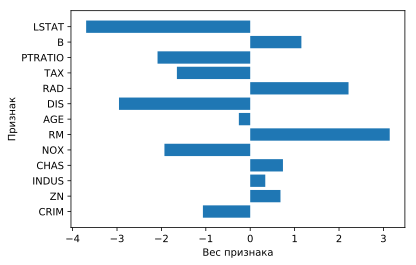

In [41]:
plt.barh(X_train.columns, lr.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')

In [42]:
feats = ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']

In [43]:
def create_model(X_train, y_train, X_test, y_test, feats, model):
    model.fit(X_train.loc[:, feats], y_train)
    y_pred = model.predict(X_test.loc[:, feats])
    return mean_squared_error(y_test, y_pred)

In [44]:
create_model(X_train_scaled, y_train, X_test_scaled, y_test, feats, LinearRegression()) < init_mse

True

In [45]:
# линейная регрессия с  L1 и L2 регуляризацией соответственно
from sklearn.linear_model import Lasso, Ridge

In [46]:
model = Lasso(alpha=0.003)

In [47]:
create_model(X_train_scaled, y_train, X_test_scaled, y_test, feats, model)

21.81140873202922

In [48]:
model = Ridge(alpha = 0.001)

In [49]:
create_model(X_train_scaled, y_train, X_test_scaled, y_test, feats, model)

21.79027835256984

In [50]:
# Логистическая регрессия
from sklearn.linear_model import LogisticRegression

In [51]:
data = pd.read_csv('train_titanic.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [52]:
data.set_index('PassengerId', inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [54]:
target = 'Survived'

In [55]:
y = data[target]

In [56]:
X = data.drop(target, axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 76.6+ KB


In [57]:
X.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 55.7+ KB


In [58]:
mean_age = X['Age'].mean()
mean_age

29.69911764705882

In [59]:
X['Age'] = X['Age'].fillna(mean_age)
X['Age'].unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

In [60]:
X['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [61]:
embarked_mode = X['Embarked'].mode()[0]
embarked_mode

'S'

In [62]:
X['Embarked'] = X['Embarked'].fillna(embarked_mode)
X['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [63]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 55.7+ KB


In [64]:
X['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [65]:
X['Sex'] = (X['Sex'] == 'female').astype(int)
X['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [66]:
X=pd.get_dummies(X)
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [67]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.3 KB


In [68]:
X['Pclass'].unique()

array([3, 1, 2])

In [69]:
X['Pclass'] = X['Pclass'].astype('category')

In [70]:
X = pd.get_dummies(X)
X.columns

Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [71]:
X.head()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,0,1,0,0,1
2,1,38.0,1,0,71.2833,1,0,0,1,0,0
3,1,26.0,0,0,7.9250,0,0,1,0,0,1
4,1,35.0,1,0,53.1000,0,0,1,1,0,0
5,0,35.0,0,0,8.0500,0,0,1,0,0,1


In [72]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

In [73]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 299 to 103
Data columns (total 11 columns):
Sex           668 non-null int64
Age           668 non-null float64
SibSp         668 non-null int64
Parch         668 non-null int64
Fare          668 non-null float64
Embarked_C    668 non-null uint8
Embarked_Q    668 non-null uint8
Embarked_S    668 non-null uint8
Pclass_1      668 non-null uint8
Pclass_2      668 non-null uint8
Pclass_3      668 non-null uint8
dtypes: float64(2), int64(3), uint8(6)
memory usage: 35.2 KB


In [74]:
lr = LogisticRegression()

In [75]:
lr.fit(X_train, y_train)

/home/ivan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [76]:
y_pred = lr.predict(X_valid)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0])

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
accuracy_score(y_valid, y_pred)

0.8026905829596412

In [79]:
y_pred_train = lr.predict(X_train)
accuracy_score(y_train, y_pred_train)

0.8083832335329342

In [80]:
y_proba = lr.predict_proba(X_valid)
y_proba

array([[0.88825089, 0.11174911],
       [0.73066433, 0.26933567],
       [0.87036678, 0.12963322],
       [0.08974895, 0.91025105],
       [0.25113485, 0.74886515],
       [0.07820796, 0.92179204],
       [0.33314919, 0.66685081],
       [0.90541516, 0.09458484],
       [0.24423876, 0.75576124],
       [0.10298452, 0.89701548],
       [0.69421844, 0.30578156],
       [0.93503633, 0.06496367],
       [0.62521553, 0.37478447],
       [0.84802207, 0.15197793],
       [0.75860023, 0.24139977],
       [0.07875431, 0.92124569],
       [0.72740919, 0.27259081],
       [0.33306499, 0.66693501],
       [0.70241811, 0.29758189],
       [0.70643023, 0.29356977],
       [0.8840687 , 0.1159313 ],
       [0.64257017, 0.35742983],
       [0.39867147, 0.60132853],
       [0.86966318, 0.13033682],
       [0.89854397, 0.10145603],
       [0.92819182, 0.07180818],
       [0.56595286, 0.43404714],
       [0.72830326, 0.27169674],
       [0.9143898 , 0.0856102 ],
       [0.42690772, 0.57309228],
       [0.

In [81]:
X_train.to_pickle('X_train.pkl')
y_train.to_pickle('y_train.pkl')

X_valid.to_pickle('X_valid.pkl')
y_valid.to_pickle('y_valid.pkl')

In [82]:
# Метод опорных векторов
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

In [83]:
scaler = MinMaxScaler()

In [84]:
X_train.head()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,
299,0,29.699118,0,0,30.5000,0,0,1,1,0,0
885,0,25.000000,0,0,7.0500,0,0,1,0,0,1
248,1,24.000000,0,2,14.5000,0,0,1,0,1,0
479,0,22.000000,0,0,7.5208,0,0,1,0,0,1
306,0,0.920000,1,2,151.5500,0,0,1,1,0,0


In [85]:
X_train.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.342814,29.476233,0.553892,0.372754,32.179397,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,0.475006,13.009962,1.185279,0.795588,51.604012,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.925000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.699118,0.000000,0.000000,14.400000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,35.000000,1.000000,0.000000,30.500000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
cols_for_scale = ['Age', 'SibSp', 'Parch', 'Fare']

In [87]:
X_train[cols_for_scale] = scaler.fit_transform(X_train[cols_for_scale])
X_train.describe()

/home/ivan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/ivan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/ivan/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.342814,0.365120,0.069237,0.062126,0.062810,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,0.475006,0.163483,0.148160,0.132598,0.100724,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.271174,0.000000,0.000000,0.015469,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.367921,0.000000,0.000000,0.028107,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.434531,0.125000,0.000000,0.059532,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [88]:
X_valid[cols_for_scale] = scaler.transform(X_valid[cols_for_scale])
X_valid.describe()

/home/ivan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/ivan/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.00000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,0.381166,0.376310,0.053812,0.068012,0.063003,0.22870,0.085202,0.686099,0.286996,0.192825,0.520179
std,0.486766,0.163162,0.100208,0.139652,0.085059,0.42094,0.279810,0.465121,0.453377,0.395404,0.500717
min,0.000000,0.005152,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.283740,0.000000,0.000000,0.015412,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.367921,0.000000,0.000000,0.029758,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.447097,0.125000,0.166667,0.061155,0.00000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,0.886906,0.500000,0.833333,0.512122,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
from sklearn.externals import joblib

In [90]:
joblib.dump(scaler, 'min_max_scaler.pkl')

['min_max_scaler.pkl']

In [91]:
scaler = joblib.load('min_max_scaler.pkl')

In [92]:
# SVC 
clf = SVC()

In [93]:
clf.fit(X_train, y_train)

/home/ivan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [94]:
y_pred = clf.predict(X_valid)

In [95]:
y_pred_train = clf.predict(X_train)

In [96]:
accuracy_score(y_valid, y_pred)

0.7847533632286996

In [97]:
# tuning SVC

In [98]:
c_vals = np.logspace(-2, 5, 29)
c_vals

array([1.00000000e-02, 1.77827941e-02, 3.16227766e-02, 5.62341325e-02,
       1.00000000e-01, 1.77827941e-01, 3.16227766e-01, 5.62341325e-01,
       1.00000000e+00, 1.77827941e+00, 3.16227766e+00, 5.62341325e+00,
       1.00000000e+01, 1.77827941e+01, 3.16227766e+01, 5.62341325e+01,
       1.00000000e+02, 1.77827941e+02, 3.16227766e+02, 5.62341325e+02,
       1.00000000e+03, 1.77827941e+03, 3.16227766e+03, 5.62341325e+03,
       1.00000000e+04, 1.77827941e+04, 3.16227766e+04, 5.62341325e+04,
       1.00000000e+05])

In [99]:
accuracy_valid = []
accuracy_train = []
for val in c_vals:
    clf = SVC(C=val, gamma='scale')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    y_pred_train = clf.predict(X_train)
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    accuracy_valid.append(acc_valid)
    accuracy_train.append(acc_train)
    print(f'C = {val} \n\tacc_valid = {acc_valid} \n\tacc_train = {acc_train}\n')

C = 0.01 
	acc_valid = 0.600896860986547 
	acc_train = 0.6212574850299402

C = 0.01778279410038923 
	acc_valid = 0.600896860986547 
	acc_train = 0.6212574850299402

C = 0.03162277660168379 
	acc_valid = 0.7802690582959642 
	acc_train = 0.7889221556886228

C = 0.05623413251903491 
	acc_valid = 0.7847533632286996 
	acc_train = 0.7979041916167665

C = 0.1 
	acc_valid = 0.8071748878923767 
	acc_train = 0.812874251497006

C = 0.1778279410038923 
	acc_valid = 0.8071748878923767 
	acc_train = 0.812874251497006

C = 0.31622776601683794 
	acc_valid = 0.8071748878923767 
	acc_train = 0.812874251497006

C = 0.5623413251903491 
	acc_valid = 0.8071748878923767 
	acc_train = 0.812874251497006

C = 1.0 
	acc_valid = 0.8071748878923767 
	acc_train = 0.8158682634730539

C = 1.7782794100389228 
	acc_valid = 0.8071748878923767 
	acc_train = 0.8158682634730539

C = 3.1622776601683795 
	acc_valid = 0.8116591928251121 
	acc_train = 0.8158682634730539

C = 5.623413251903491 
	acc_valid = 0.8161434977578476 


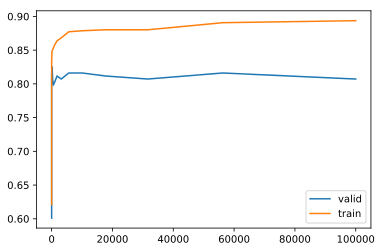

In [100]:
plt.plot(c_vals, accuracy_valid)
plt.plot(c_vals, accuracy_train)
plt.legend(['valid', 'train'])

In [101]:
#KNN К ближайших соседей
from pylab import rcParams
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler

In [102]:
scaler = RobustScaler()

In [103]:
X_train = pd.read_pickle('X_train.pkl')
y_train = pd.read_pickle('y_train.pkl')

X_valid = pd.read_pickle('X_valid.pkl')
y_valid = pd.read_pickle('y_valid.pkl')

In [104]:
cols_for_scale

['Age', 'SibSp', 'Parch', 'Fare']

In [105]:
X_train[cols_for_scale] = scaler.fit_transform(X_train[cols_for_scale])
X_train.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.342814,-0.017145,0.553892,0.372754,0.787570,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,0.475006,1.000766,1.185279,0.795588,2.285892,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,0.000000,-2.252240,0.000000,0.000000,-0.637874,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.592240,0.000000,0.000000,-0.286822,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.407760,1.000000,0.000000,0.713178,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.869299,8.000000,6.000000,22.056664,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [106]:
X_valid[cols_for_scale] = scaler.transform(X_valid[cols_for_scale])

In [107]:
k_vals = np.arange(2, 10)

In [108]:
accuracy_train = []
accuracy_valid = []
for val in k_vals:
    clf = KNeighborsClassifier(n_neighbors=val)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    y_pred_train = clf.predict(X_train)
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    accuracy_valid.append(acc_valid)
    accuracy_train.append(acc_train)
    print(f'n_neighbors = {val}\n\tacc_valid = {acc_valid}\n\tacc_train = {acc_train}\n')
    

n_neighbors = 2
	acc_valid = 0.7937219730941704
	acc_train = 0.8772455089820359

n_neighbors = 3
	acc_valid = 0.8161434977578476
	acc_train = 0.875748502994012

n_neighbors = 4
	acc_valid = 0.7892376681614349
	acc_train = 0.8458083832335329

n_neighbors = 5
	acc_valid = 0.8071748878923767
	acc_train = 0.8637724550898204

n_neighbors = 6
	acc_valid = 0.8251121076233184
	acc_train = 0.8353293413173652

n_neighbors = 7
	acc_valid = 0.7847533632286996
	acc_train = 0.8323353293413174

n_neighbors = 8
	acc_valid = 0.7713004484304933
	acc_train = 0.8173652694610778

n_neighbors = 9
	acc_valid = 0.7802690582959642
	acc_train = 0.8173652694610778



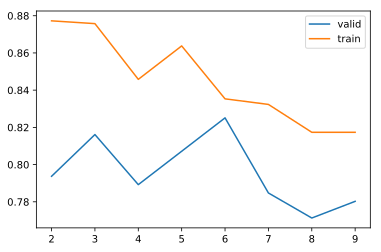

In [110]:
plt.plot(k_vals, accuracy_valid)
plt.plot(k_vals, accuracy_train)
plt.legend(['valid', 'train'])

In [111]:
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)

In [112]:
accuracy_score(y_valid, y_pred)

0.8251121076233184

In [114]:
y_valid.value_counts(normalize=True)

0    0.600897
1    0.399103
Name: Survived, dtype: float64

In [115]:
from sklearn.metrics import confusion_matrix

In [116]:
confusion_matrix(y_valid, y_pred)

array([[123,  11],
       [ 28,  61]])

In [118]:
# true negative
TN = ((y_valid == 0) & (y_pred == 0)).sum()
TN

123

In [120]:
# false positive
FP = ((y_valid == 0) & (y_pred == 1)).sum()
FP

11

In [122]:
# False negative
FN = ((y_valid == 1) & (y_pred == 0)).sum()
FN

28

In [123]:
# true positive
TP = ((y_valid == 1) & (y_pred == 1)).sum()
TP

61

In [129]:
# Точность. доля правильно угаданных выживших от всех тех, кого мы предсказали выжившими
Precicion = TP / (TP + FP)
Precicion

0.8472222222222222

In [130]:
from sklearn.metrics import precision_score

In [131]:
precision_score(y_valid, y_pred)

0.8472222222222222

In [132]:
# Полнота. доля правильно угаданных выживших от тех кто действительно выжил
Recall = TP / (TP + FN)
Recall

0.6853932584269663

In [133]:
from sklearn.metrics import recall_score

In [134]:
recall_score(y_valid, y_pred)

0.6853932584269663

In [136]:
# F1 - точность и полнота. Чем ближе к 1, тем модель лучше
F1 = 2 * (Precicion * Recall) / (Precicion + Recall)
F1

0.7577639751552795

In [138]:
from sklearn.metrics import f1_score

In [139]:
f1_score(y_valid, y_pred)

0.7577639751552795

In [140]:
# AUC - площадь под кривой

In [141]:
y_pred_proba = clf.predict_proba(X_valid)
y_pred_proba

array([[0.66666667, 0.33333333],
       [0.83333333, 0.16666667],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [0.16666667, 0.83333333],
       [0.83333333, 0.16666667],
       [0.5       , 0.5       ],
       [0.16666667, 0.83333333],
       [0.66666667, 0.33333333],
       [0.83333333, 0.16666667],
       [0.83333333, 0.16666667],
       [1.        , 0.        ],
       [0.83333333, 0.16666667],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.16666667, 0.83333333],
       [1.        , 0.        ],
       [0.83333333, 0.16666667],
       [0.83333333, 0.16666667],
       [0.5       , 0.5       ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.83333333, 0.16666667],
       [0.66666667, 0.33333333],
       [0.83333333, 0.16666667],
       [0.66666667, 0.33333333],
       [0.5       , 0.5       ],
       [0.

In [142]:
y_pred_proba = y_pred_proba[:, 1]
y_pred_proba

array([0.33333333, 0.16666667, 0.        , 1.        , 0.5       ,
       1.        , 0.83333333, 0.16666667, 0.5       , 0.83333333,
       0.33333333, 0.16666667, 0.16666667, 0.        , 0.16666667,
       1.        , 0.33333333, 0.83333333, 0.        , 0.16666667,
       0.16666667, 0.5       , 0.33333333, 0.        , 0.        ,
       0.16666667, 0.33333333, 0.16666667, 0.33333333, 0.5       ,
       0.16666667, 0.66666667, 0.33333333, 0.5       , 0.16666667,
       0.33333333, 0.5       , 0.83333333, 0.5       , 0.        ,
       0.16666667, 0.16666667, 0.        , 0.16666667, 0.5       ,
       0.16666667, 0.16666667, 0.        , 0.16666667, 0.5       ,
       0.33333333, 0.5       , 0.        , 0.66666667, 0.        ,
       0.83333333, 0.33333333, 0.83333333, 1.        , 0.66666667,
       0.16666667, 1.        , 0.66666667, 0.5       , 0.16666667,
       0.66666667, 0.33333333, 0.        , 0.33333333, 1.        ,
       0.83333333, 0.83333333, 0.33333333, 1.        , 0.     

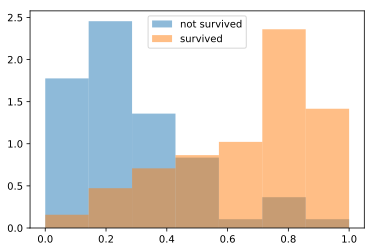

In [144]:
plt.hist(y_pred_proba[y_valid == 0], bins = 7, density = True, alpha=0.5)
plt.hist(y_pred_proba[y_valid == 1], bins = 7, density = True, alpha=0.5)
plt.legend(['not survived', 'survived'])

In [145]:
from sklearn.metrics import roc_curve

In [146]:
fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba, pos_label = 1)

In [154]:
# false positive rate (fall-out) FRP = FP / (FP + TN)
fpr

array([0.        , 0.01492537, 0.06716418, 0.08208955, 0.20149254,
       0.39552239, 0.74626866, 1.        ])

In [155]:
# true positive rate (recall, sensitivity) TPR = TP / (TP + FN)
tpr

array([0.        , 0.20224719, 0.53932584, 0.68539326, 0.80898876,
       0.91011236, 0.97752809, 1.        ])

In [156]:
thresholds

array([2.        , 1.        , 0.83333333, 0.66666667, 0.5       ,
       0.33333333, 0.16666667, 0.        ])

Text(0, 0.5, 'TPR')

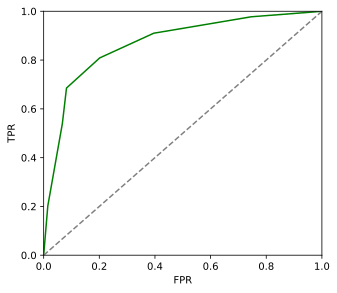

In [157]:
rcParams['figure.figsize'] = 5, 4.5
plt.plot(fpr, tpr, color='green', label='ROC curve')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('FPR')
plt.ylabel('TPR')

In [158]:
from sklearn.metrics import roc_auc_score

In [159]:
roc_auc_score(y_valid, y_pred_proba)

0.8679356028844541

In [161]:
# Титаник с использованием деревьев решений
from sklearn.tree import DecisionTreeClassifier

In [162]:
X_train = pd.read_pickle('X_train.pkl')
y_train = pd.read_pickle('y_train.pkl')

X_valid = pd.read_pickle('X_valid.pkl')
y_valid = pd.read_pickle('y_valid.pkl')

In [164]:
# нормализовывать не надо
max_depth_arr = np.arange(2, 20)
max_depth_arr

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])

In [166]:
accuracy_valid = []
accuracy_train = []
for val in max_depth_arr:
    clf = DecisionTreeClassifier(max_depth=val, random_state=100)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    y_pred_train = clf.predict(X_train)
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    accuracy_valid.append(acc_valid)
    accuracy_train.append(acc_train)
    print(f'max_depth = {val}\n\tacc_valid = {acc_valid}\n\tacc_train = {acc_train}\n')    

max_depth = 2
	acc_valid = 0.7757847533632287
	acc_train = 0.8023952095808383

max_depth = 3
	acc_valid = 0.8026905829596412
	acc_train = 0.8323353293413174

max_depth = 4
	acc_valid = 0.8071748878923767
	acc_train = 0.842814371257485

max_depth = 5
	acc_valid = 0.8026905829596412
	acc_train = 0.8488023952095808

max_depth = 6
	acc_valid = 0.7713004484304933
	acc_train = 0.8577844311377245

max_depth = 7
	acc_valid = 0.8116591928251121
	acc_train = 0.875748502994012

max_depth = 8
	acc_valid = 0.7623318385650224
	acc_train = 0.8967065868263473

max_depth = 9
	acc_valid = 0.7713004484304933
	acc_train = 0.9131736526946108

max_depth = 10
	acc_valid = 0.7443946188340808
	acc_train = 0.9341317365269461

max_depth = 11
	acc_valid = 0.7533632286995515
	acc_train = 0.9491017964071856

max_depth = 12
	acc_valid = 0.7488789237668162
	acc_train = 0.9580838323353293

max_depth = 13
	acc_valid = 0.7443946188340808
	acc_train = 0.9700598802395209

max_depth = 14
	acc_valid = 0.7309417040358744
	ac

(2, 19)

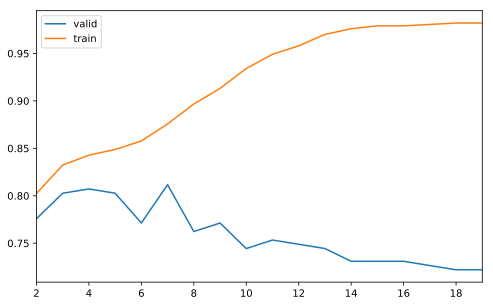

In [175]:
rcParams['figure.figsize'] = 8, 5
plt.plot(max_depth_arr, accuracy_valid)
plt.plot(max_depth_arr, accuracy_train)
plt.legend(['valid', 'train'])
plt.xlim(2, 19)

In [172]:
clf = DecisionTreeClassifier(max_depth=7, random_state=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)

In [174]:
accuracy_score(y_pred, y_valid)

0.8116591928251121

In [176]:
# Random Forest

In [177]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [178]:
parameters = [{'n_estimators': [150, 200, 250], 
               'max_features': np.arange(5, 9),
               'max_depth': np.arange(5, 10)}]

In [180]:
clf = GridSearchCV(estimator=RandomForestClassifier(random_state=100), 
                   param_grid=parameters,
                   scoring='accuracy',
                   cv=5)

In [181]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [150, 200, 250], 'max_features': array([5, 6, 7, 8]), 'max_depth': array([5, 6, 7, 8, 9])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [182]:
clf.best_params_

{'max_depth': 5, 'max_features': 5, 'n_estimators': 200}

In [187]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print(f'{mean:.3f} +- {std * 2:.3f} for {params}')

0.822 +- 0.070 for {'max_depth': 5, 'max_features': 5, 'n_estimators': 150}
0.825 +- 0.069 for {'max_depth': 5, 'max_features': 5, 'n_estimators': 200}
0.822 +- 0.067 for {'max_depth': 5, 'max_features': 5, 'n_estimators': 250}
0.819 +- 0.079 for {'max_depth': 5, 'max_features': 6, 'n_estimators': 150}
0.819 +- 0.079 for {'max_depth': 5, 'max_features': 6, 'n_estimators': 200}
0.820 +- 0.079 for {'max_depth': 5, 'max_features': 6, 'n_estimators': 250}
0.822 +- 0.077 for {'max_depth': 5, 'max_features': 7, 'n_estimators': 150}
0.823 +- 0.075 for {'max_depth': 5, 'max_features': 7, 'n_estimators': 200}
0.822 +- 0.073 for {'max_depth': 5, 'max_features': 7, 'n_estimators': 250}
0.819 +- 0.061 for {'max_depth': 5, 'max_features': 8, 'n_estimators': 150}
0.816 +- 0.068 for {'max_depth': 5, 'max_features': 8, 'n_estimators': 200}
0.820 +- 0.066 for {'max_depth': 5, 'max_features': 8, 'n_estimators': 250}
0.817 +- 0.058 for {'max_depth': 6, 'max_features': 5, 'n_estimators': 150}
0.819 +- 0.0

In [188]:
y_pred = clf.predict(X_valid)
accuracy_score(y_valid, y_pred)

0.8161434977578476

In [191]:
clf = RandomForestClassifier(max_depth = 5, max_features=5, n_estimators=200, random_state=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)

In [192]:
accuracy_score(y_valid, y_pred)

0.8161434977578476